In [2]:
import re
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import shutil
from decimal import Decimal, getcontext
import tensorflow as tf

from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

2023-05-07 19:05:46.170754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 19:05:51.979050: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sac0380/miniconda3/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-07 19:05:51.979295: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sac0380/miniconda3/lib/python3.10/site-packages/cv2/.

In [20]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
# import os
# def get_size(start_path = 'training/'):
#     total_size = 0
#     for dirpath, dirnames, filenames in os.walk(start_path):
#         for f in filenames:
#             fp = os.path.join(dirpath, f)
#             # skip if it is symbolic link
#             if not os.path.islink(fp):
#                 total_size += os.path.getsize(fp)

#     return total_size

# sum(os.path.getsize(f) for f in os.listdir('.') if os.path.isfile(f))/(1024*1024)

In [21]:
sam = sam_model_registry["vit_h"](checkpoint="segmentation/sam_vit_h_4b8939.pth").to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)

In [4]:
def show_anns(anns):
    img2 = np.zeros((240, 240, 3))
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            #img[:,:,i] = 0
        ax.imshow(np.dstack((img, m*0.35))) 


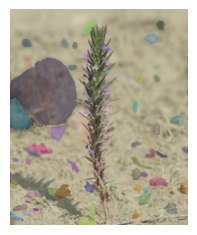

In [30]:
image = cv2.imread("/home/sac0380/plant_trait_identification/images/Ziziphora tenuior0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)  

plt.figure(figsize=(2.8,2.8))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()
# plt.savefig(os.path.join('', "try.jpg"), bbox_inches='tight')

# model = tf.keras.models.load_model("leaf_area2.h5")
# img = cv2.imread("try.jpg")
# img = cv2.resize(img, (224,224))
# img = np.expand_dims(img, axis=0)
# value = model.predict(img)

In [87]:
img = cv2.imread("try.jpg")
print(img.shape)

(235, 235, 3)


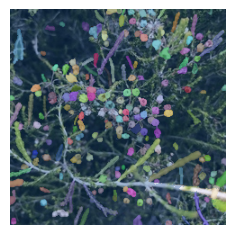

In [94]:
plt.figure(figsize=(2.8,2.8))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
#plt.savefig(os.path.join('', "try.jpg"), bbox_inches='tight')
plt.show()

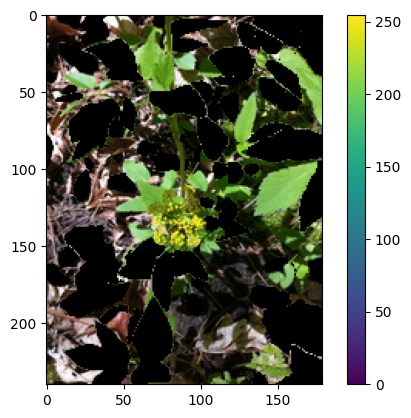

In [34]:
image = cv2.imread("/home/sac0380/plant_trait_identification/images/Zizia aurea9.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)  

mask_final = np.zeros((image.shape[0],image.shape[1]))
for mask in masks:
    seg = np.array(mask['segmentation'])*1

    mask_final += seg
mask_final = np.where(mask_final>1,0,1)
for i in range(3):
    image[:, :, i] = image[:, :, i] * mask_final
plt.imshow(image)
plt.colorbar()
plt.show()


In [23]:
mask_final

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 2., 2., ..., 1., 1., 1.],
       [1., 2., 2., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
image = cv2.imread("/home/sac0380/plant_trait_identification/images/Zizia aurea9.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)  

mask_final = np.zeros((image.shape[0],image.shape[1]))
for mask in masks:
    seg = np.array(mask['segmentation'])*1

    mask_final += seg
mask_final = np.where(mask_final>1,,0)
for i in range(3):
    image[:, :, i] = image[:, :, i] * mask_final
plt.imshow(image)
plt.colorbar()

In [4]:
import shutil
shutil.copytree('training', 'segmented_images')

'segmented_images'

In [23]:
i = 0
for folder in tqdm(glob.glob("segmented_images/*")):
    for file in glob.glob(folder+"/*.jpg"):

        fig = plt.figure(figsize=(2.8,2.8))
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        masks = mask_generator.generate(image)  

        mask_final = np.zeros((image.shape[0],image.shape[1]))
        for mask in masks:
            seg = np.array(mask['segmentation'])*1

            mask_final += seg
        mask_final = np.where(mask_final>1,1,0)
        for i in range(3):
            image[:, :, i] = image[:, :, i] * mask_final
        plt.imshow(image)
        plt.axis('off')
        plt.savefig(file, bbox_inches='tight')
        plt.close()

    


100%|██████████| 1497/1497 [13:16:38<00:00, 31.93s/it]  


In [18]:
i = 0
flag = 0
for folder in glob.glob("segmented_images/*"):

    if i ==344:
        print(folder)
        flag = 1
        break
    i+=1


segmented_images/1203.5375
